## Classification of MNIST data to see the best optimization algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('train.csv', header=None) 

In [4]:
test = pd.read_csv('test.csv', header = None)

In [18]:
def cost_function(w, X, y):
    return np.log(np.exp(-y * (X @ w)) + 1).sum() / len(X)

In [19]:
def gradient(w, X, y):
    temp_matrix = (-y / (1 + np.exp(y * (X @ w))))[:, np.newaxis] * X
    temp_matrix = temp_matrix.sum(axis=0)
    temp_matrix = temp_matrix / len(X) 
    return temp_matrix

In [21]:
def gradient_descent(X, y, mu, T):
    F_values = [] 
    w = np.zeros(X.shape[1])    
    for i in range(0, T):  
        w -= mu * grad    
        grad = gradient(w, X, y)
        F_values.append(cost_function(w, X, y))  
    return w, F_values

### Digits 3 and 8

In [15]:
three_train = train[train[0] == 3].iloc[:750, 1:].to_numpy()
eight_train = train[train[0] == 8].iloc[:750, 1:].to_numpy()

In [16]:
X = np.zeros((1500, 784))  

y = np.ones(1500)    

X[:750] = three_train 
X[750:] = eight_train 

Text(0, 0.5, 'loss function')

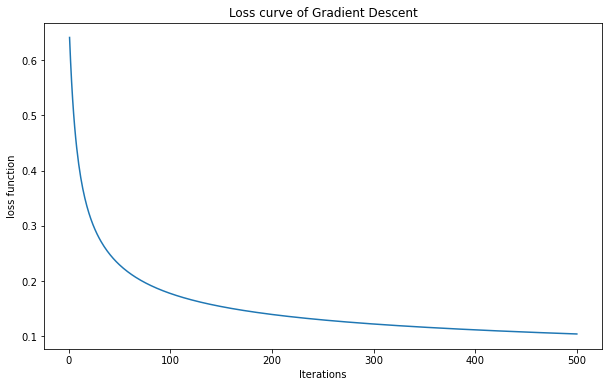

In [24]:
mu = 1e-6
T = 500
w, F_values = gradient_descent(X, y, mu, T)  
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.arange(1, T+1), F_values)
ax.set_title('Loss curve of Gradient Descent')
ax.set_xlabel('Iterations')
ax.set_ylabel('loss function')

In [25]:
three_test = test[test[0] == 3].iloc[:750, 1:].to_numpy()
eight_test = test[test[0] == 8].iloc[:750, 1:].to_numpy()

In [26]:
X_test = np.zeros((1500, 784))  

y_test = np.ones(1500)  

X_test[:750] = three_test 
X_test[750:] = eight_test  

In [27]:
train_predictions = np.sign(X @ w)
train_accuracy = np.mean(train_predictions == y) 

In [28]:
test_predictions = np.sign(X_test @ w)  
test_accuracy = np.mean(test_predictions == y_test) 

In [29]:
print("Training Accuracy: ", train_accuracy)
print("Testing Accuracy: ", test_accuracy)

Training Accuracy:	0.9727
Test Accuracy:	0.9607


### Digits 5 and 8

In [30]:
five_train = train[train[0] == 5].iloc[:750, 1:].to_numpy()
eight_train = train[train[0] == 8].iloc[:750, 1:].to_numpy()

In [31]:
X2 = np.zeros((1500, 784))  

y2 = np.ones(1500)  

X2[:750] = five_train 
X2[750:] = eight_train  

Text(0, 0.5, 'loss function')

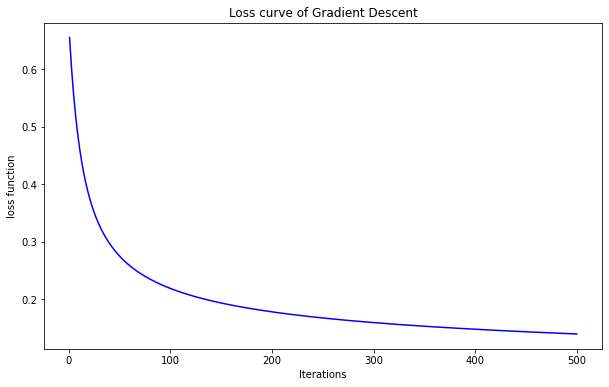

In [32]:
mu = 1e-6
T = 500
w, F_values = gradient_descent(X2, y2, mu, T)  
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(F_values, color = 'blue')
ax.set_title('Loss curve of Gradient Descent')
ax.set_xlabel('Iterations')
ax.set_ylabel('loss function')

In [33]:
five_test = test[test[0] == 5].iloc[:750, 1:].to_numpy()
eight_test = test[test[0] == 8].iloc[:750, 1:].to_numpy()

In [34]:
X2_test = np.zeros((1500, 784))  

y2_test = np.ones(1500)  

X2_test[:750] = five_test 
X2_test[750:] = eight_test  

In [35]:
train_predictions2 = np.sign(X2 @ w)
train_accuracy2 = np.mean(train_predictions == y2) 

In [36]:
test_predictions2 = np.sign(X2_test @ w)  
test_accuracy2 = np.mean(test_predictions2 == y2_test) 

In [37]:
print("Training Accuracy: ", train_accuracy2)
print("Testing Accuracy: ", test_accuracy2)

Training Accuracy:	0.9727
Test Accuracy:	0.9380


### Gradient Descent Algorithms - Steepest Descent - Infinity and Unit

In [39]:
def infinity_gd(X, y, mu, T):
    F_values = []
    w = np.zeros(X.shape[1]) 
    i = 0
    while i >= 0 and i < T:
        p = - np.linalg.norm(grad, ord=1) * np.sign(grad) 
        w += mu * p 
        grad = gradient(w, X, y)
        F_values.append(cost_function(w, X, y)) 
        i += 1
    return w, F_values

In [40]:
def unit_gd(X, y, mu, T):
    F_values = []
    w = np.zeros(X.shape[1]) 
    i = 0
    while i >= 0 and i < T:
        idx = np.abs(grad).argmax() 
        e = np.eye(len(grad))[idx] 
        p = (- np.linalg.norm(grad, ord=np.inf) * np.sign(grad[idx]) * e) 
        w += mu * p
        grad = gradient(w, X, y)
        F_values.append(cost_function(w, X, y))
        i += 1
    return w, F_values

Text(0, 0.5, 'loss function')

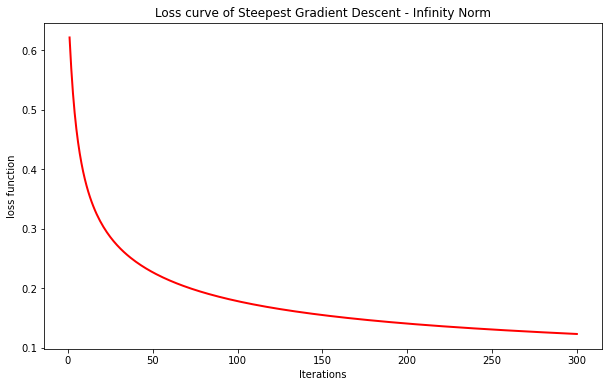

In [41]:
mu = 1e-8
T = 300
w, infinity_gd_values = infinity_gd(X2, y2, mu, T)  
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(infinity_gd_values, color = 'red', linewidth=2)
ax.set_title('Loss curve of Steepest Gradient Descent - Infinity Norm')
ax.set_xlabel('Iterations')
ax.set_ylabel('loss function')

Text(0, 0.5, 'loss function')

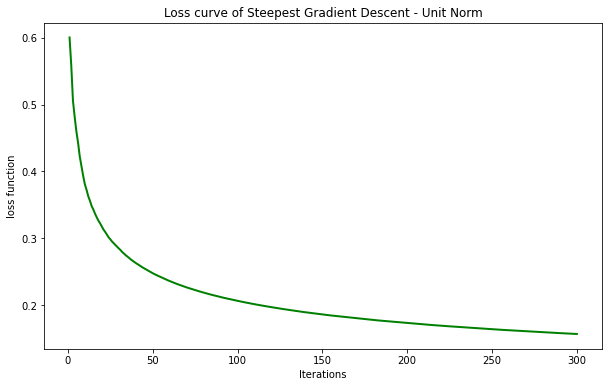

In [42]:
mu = 1e-4
T = 300
w, unit_gd_values = unit_gd(X2, y2, mu, T)  
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(unit_gd_values, color = 'green', linewidth=2)
ax.set_title('Loss curve of Steepest Gradient Descent - Unit Norm')
ax.set_xlabel('Iterations')
ax.set_ylabel('loss function')

Text(0, 0.5, 'loss')

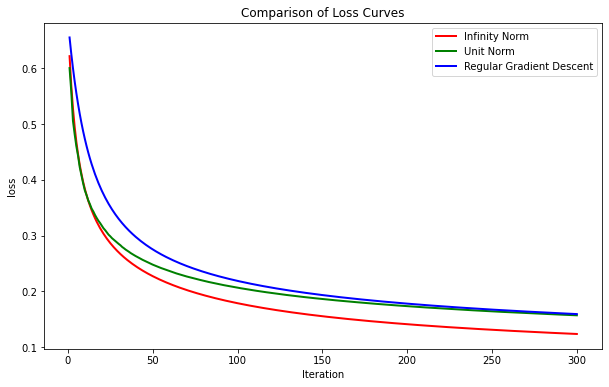

In [43]:
mu = 1e-6
T = 300
w, gd_values = gradient_descent(X2, y2, mu, T) # implement GD
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(infinity_gd_values, color='r', linewidth = 2, label='Infinity Norm')
ax.plot(unit_gd_values, color='g', linewidth = 2, label='Unit Norm')
ax.plot(gd_values, color='b', linewidth = 2, label='Regular Gradient Descent')
ax.legend()
ax.set_title('Comparison of Loss Curves')
ax.set_xlabel('Iteration')
ax.set_ylabel('loss')

According to the plot of loss curves above, the infinity norm gradient descent performs the best. The unit norm gradient descent performs second best and the regular gradient descent comes third.

Text(0, 0.5, 'loss')

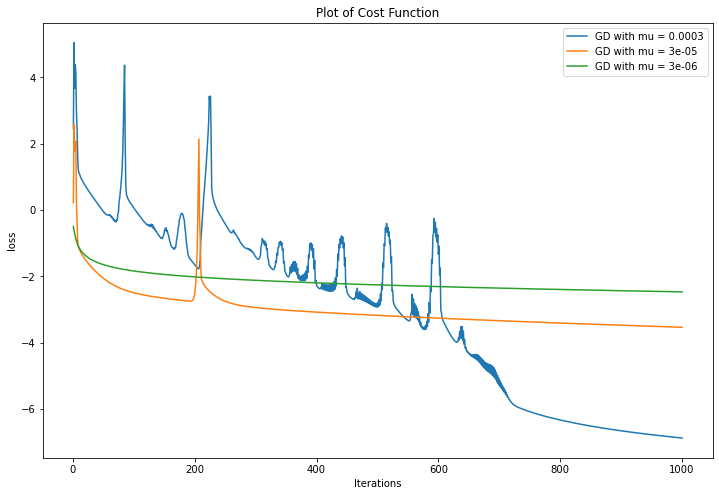

In [127]:
T = 1000
mu_vals = [3e-4, 3e-5, 3e-6]
fig, ax = plt.subplots(1, 1, figsize=(12,8))

for i in range (0, len(mu_vals)):
    w, cost_func_vals = gradient_descent(X2, y2, mu_vals[i], T)
    ax.plot(np.log(cost_func_vals), label='GD with mu = ' + str(mu_vals[i]))
ax.legend()
ax.set_title('Plot of Cost Function')
ax.set_xlabel('Iterations')
ax.set_ylabel('loss')

Text(0, 0.5, 'loss')

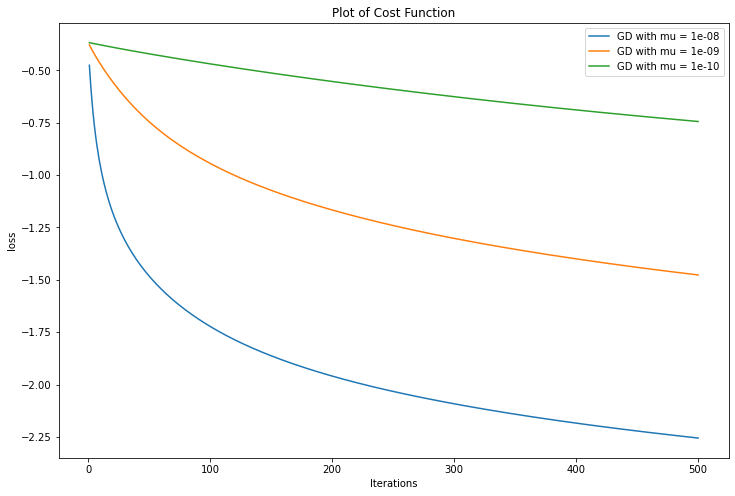

In [158]:
T = 500
mu_vals = [1e-8, 1e-9, 1e-10]
fig, ax = plt.subplots(1, 1, figsize=(12,8))

for i in range (0, len(mu_vals)):
    w, cost_func_vals = infinity_gd(X2, y2, mu_vals[i], T)
    ax.plot(np.log(cost_func_vals), label='GD with mu = ' + str(mu_vals[i]))
ax.legend()
ax.set_title('Plot of Cost Function')
ax.set_xlabel('Iterations')
ax.set_ylabel('loss')

Text(0, 0.5, 'loss')

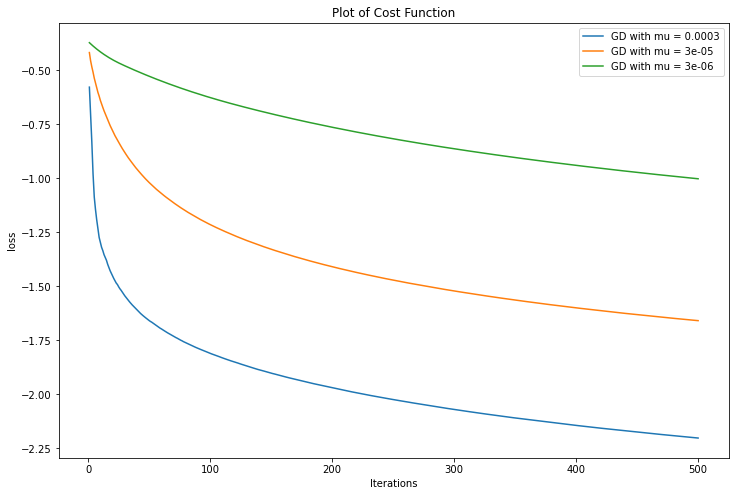

In [159]:
T = 500
mu_vals = [3e-4, 3e-5, 3e-6]
fig, ax = plt.subplots(1, 1, figsize=(12,8))

for i in range (0, len(mu_vals)):
    w, cost_func_vals = unit_gd(X2, y2, mu_vals[i], T)
    ax.plot(np.log(cost_func_vals), label='GD with mu = ' + str(mu_vals[i]))
ax.legend()
ax.set_title('Plot of Cost Function')
ax.set_xlabel('Iterations')
ax.set_ylabel('loss')

### Gradient Descent Algorithms - Momentum

In [ ]:
def momentum_gd(X, y, mu, beta, T):
    cost_values = []
    w = np.zeros(X.shape[1]) 
    w_prev = np.zeros(X.shape[1]) 
    for i in range(T): 
        w, w_prev = w - mu * gradient(w, X, y) + beta * (w - w_prev), w 
        cost_values.append(cost_function(w, X, y))
    return w, cost_values

Text(0.5, 0, 'Iterations')

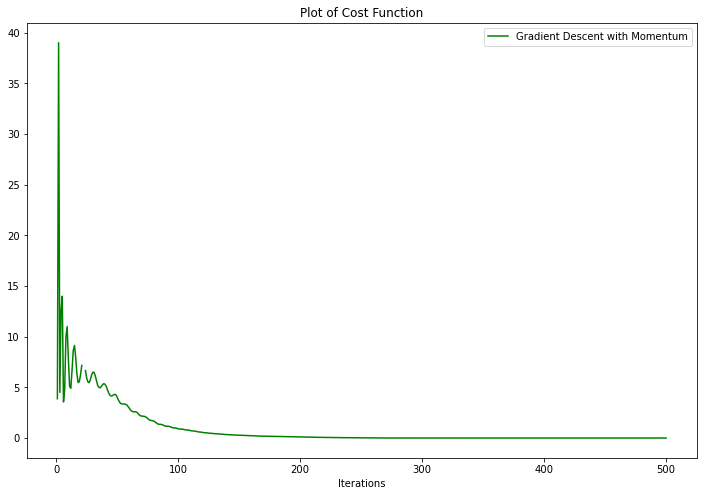

In [49]:
mu = 1e-4
T = 500
beta = 0.95
w, cost_func_values_2 = momentum_gd(X2, y2, mu, beta, T)
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.plot(cost_func_values_2, color = 'g', label='Gradient Descent with Momentum')
ax.legend()
ax.set_title('Plot of Cost Function')
ax.set_xlabel('Iterations')

In [50]:
preds_test = np.sign(X2_test @ w) 
accuracy_test = np.mean(preds_test == y2_test)
preds_train = np.sign(X2 @ w)
accuracy_train = np.mean(preds_train == y2)
print("Training Accuracy: ", train_accuracy)
print("Testing Accuracy: ", test_accuracy)

Training Accuracy:	1.0000
Test Accuracy	0.9200


Text(0, 0.5, 'loss')

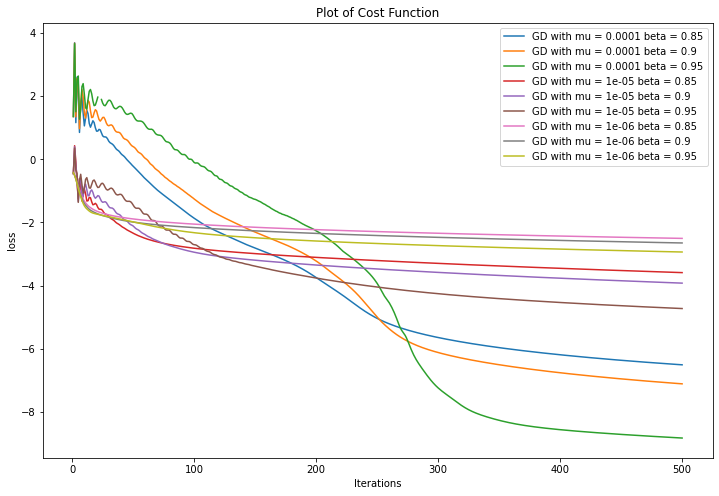

In [56]:
T = 500
mu_vals = [1e-4, 1e-5, 1e-6]
beta_vals = [0.85, 0.9, 0.95]
fig, ax = plt.subplots(1, 1, figsize=(12,8))

for i in range (0, len(mu_vals)):
    for j in range (0, len(beta_vals)):
        w, cost_func_vals = momentum_gd(X2, y2, mu_vals[i], beta_vals[j], T)
        ax.plot(np.log(cost_func_vals), label='GD with mu = ' + str(mu_vals[i]) + ' beta = ' + str(beta_vals[j]))
ax.legend()
ax.set_title('Plot of Cost Function')
ax.set_xlabel('Iterations')
ax.set_ylabel('loss')

### Gradient Descent Algorithms - Nesterov

In [58]:
def nesterov_gd(X, y, mu, beta, T):
    cost_values = []
    w = np.zeros(X.shape[1]) 
    w_prev = np.zeros(X.shape[1]) 
    for i in range(T): 
        temp_w_val = w + beta * (w - w_prev)
        w, w_prev = temp_w_val - mu * gradient(temp_w_val, X, y), w 
        cost_values.append(cost_function(w, X, y)) 
    return w, cost_values

Text(0, 0.5, 'loss')

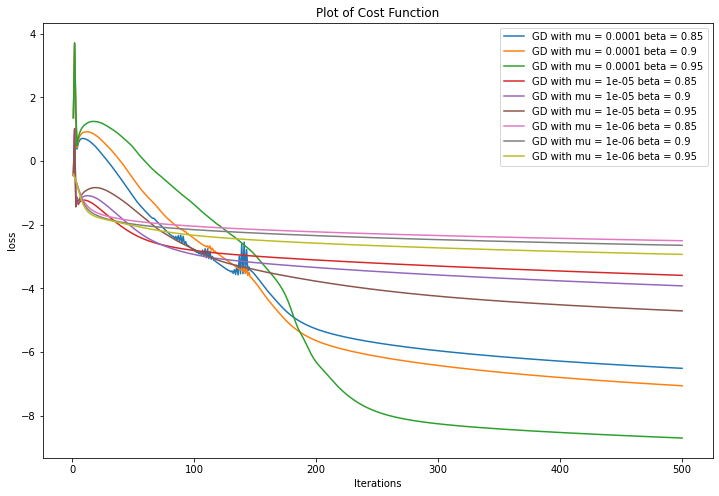

In [59]:
T = 500
mu_vals = [1e-4, 1e-5, 1e-6]
beta_vals = [0.85, 0.9, 0.95]
fig, ax = plt.subplots(1, 1, figsize=(12,8))

for i in range (0, len(mu_vals)):
    for j in range (0, len(beta_vals)):
        w, cost_func_vals = nesterov_gd(X2, y2, mu_vals[i], beta_vals[j], T)
        ax.plot(np.log(cost_func_vals), label='GD with mu = ' + str(mu_vals[i]) + ' beta = ' + str(beta_vals[j]))

ax.legend()
ax.set_title('Plot of Cost Function')
ax.set_xlabel('Iterations')
ax.set_ylabel('loss')

In [60]:
w, cost_func_values = nesterov_gd(X2, y2, 1e-4, 0.95, 500)

preds_test = np.sign(X2_test @ w) # make preditions on test data
accuracy_test = np.mean(preds_test == y2_test)

preds_train = np.sign(X2 @ w)
accuracy_train = np.mean(preds_train == y2)
print("Training Accuracy: ", train_accuracy)
print("Testing Accuracy: ", test_accuracy)

Training Accuracy:	1.0000
Test Accuracy	0.9187


### Gradient Descent Algorithms - Fletcher-Reeves

In [81]:
def fletcher_reeves_gd (X, y, beta, gamma, T):
    cost_values = []
    w = np.zeros(X.shape[1]) 
    p = -gradient(w, X, y)
    for i in range(T):
        grad = gradient(w, X, y)
        alpha = 1
        left = cost_function(w + alpha * p, X, y)
        right = cost_function(w, X, y) + alpha * gamma * np.dot(p, grad)
        while left > right:
            alpha = alpha * beta
            left = cost_function(w + alpha * p, X, y)
            right = cost_function(w, X, y) + alpha * gamma * np.dot(p, grad)
        w = w + alpha * p
        fr_beta = np.linalg.norm(gradient(w, X, y)) ** 2 / np.linalg.norm(grad)** 2
        p = -gradient(w, X, y) + fr_beta * p
        cost_values.append(cost_function(w, X, y)) 
    return w, cost_values

(0.0, 0.2)

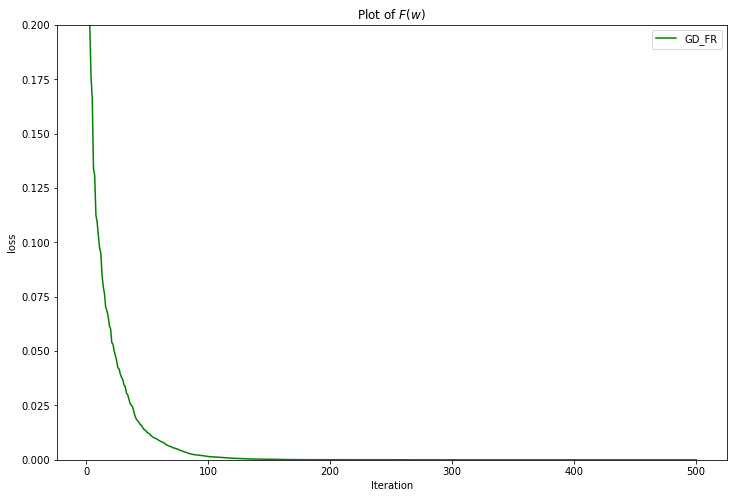

In [91]:
gamma = 0.3
beta = 0.85
T = 500
w, cost_values = fletcher_reeves_gd(X2, y2, beta, gamma, T)
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.plot(cost_values, '-g', label='GD_FR')
ax.legend()
ax.set_title('Plot of $F(w)$')
ax.set_xlabel('Iteration')
ax.set_ylabel('loss')

Text(0, 0.5, 'loss')

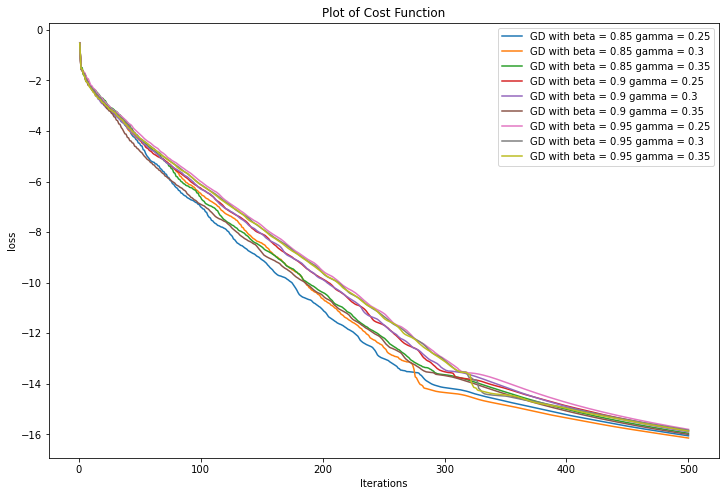

In [83]:
T = 500
beta_vals = [0.85, 0.9, 0.95]
gamma_vals = [0.25, 0.3, 0.35]
fig, ax = plt.subplots(1, 1, figsize=(12,8))

for i in range (0, len(beta_vals)):
    for j in range (0, len(gamma_vals)):
        w, cost_values = fletcher_reeves_gd(X2, y2, beta_vals[i], gamma_vals[j], T)
        ax.plot(np.log(cost_values), label='GD with beta = ' + str(beta_vals[i]) + ' gamma = ' + str(gamma_vals[j]))
# ax.set_ylim(-10, 2)
ax.legend()
ax.set_title('Plot of Cost Function')
ax.set_xlabel('Iterations')
ax.set_ylabel('loss')

Text(0, 0.5, 'loss')

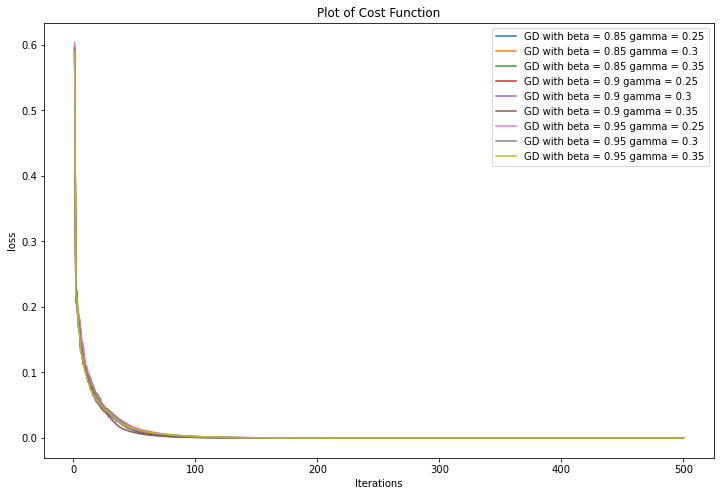

In [84]:
T = 500
beta_vals = [0.85, 0.9, 0.95]
gamma_vals = [0.25, 0.3, 0.35]
fig, ax = plt.subplots(1, 1, figsize=(12,8))

for i in range (0, len(beta_vals)):
    for j in range (0, len(gamma_vals)):
        w, cost_values = fletcher_reeves_gd(X2, y2, beta_vals[i], gamma_vals[j], T)
        ax.plot((cost_values), label='GD with beta = ' + str(beta_vals[i]) + ' gamma = ' + str(gamma_vals[j]))

ax.legend()
ax.set_title('Plot of Cost Function')
ax.set_xlabel('Iterations')
ax.set_ylabel('loss')

In [86]:
w, cost_values = fletcher_reeves_gd(X2, y2, 0.3, 0.85, 500)
preds_test = np.sign(X2 @ w) 
accuracy_test = np.mean(preds_test == y2_test)

preds_train = np.sign(X2 @ w)
accuracy_train = np.mean(preds_train == y2)
print("Training Accuracy: ", train_accuracy)
print("Testing Accuracy: ", test_accuracy)

Training Accuracy:	1.0000
Test Accuracy:	1.0000


### Gradient Descent Algorithms - Polak-Ribiere

In [110]:
def polak_ribiere_gd(X, y, beta, gamma, T):
    cost_values = []
    w = np.zeros(X.shape[1]) 
    p = - gradient(w, X, y)
    for i in range(T): 
        grad = gradient(w, X, y)
        alpha = 1
        left = cost_function(w + alpha * p, X, y)
        right = cost_function(w, X, y) + alpha * gamma * np.dot(p, grad)
        while left > right:
            alpha = alpha * beta
            left = cost_function(w + alpha * p, X, y)
            right = cost_function(w, X, y) + alpha * gamma * np.dot(p, grad)
        w = w + alpha * p
        next_grad = gradient(w, X, y)
        beta_PR = np.dot(next_grad, next_grad-grad) ** 2 / np.linalg.norm(grad) ** 2
        p = - next_grad + beta_PR * p
        cost_values.append(cost_function(w, X, y)) 
    return w, cost_values

Text(0, 0.5, 'loss')

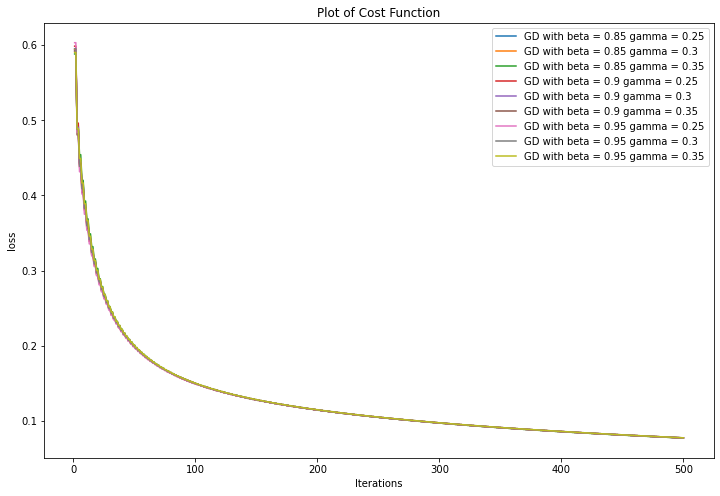

In [111]:
T = 500
beta_vals = [0.85, 0.9, 0.95]
gamma_vals = [0.25, 0.3, 0.35]
fig, ax = plt.subplots(1, 1, figsize=(12,8))

for i in range (0, len(beta_vals)):
    for j in range (0, len(gamma_vals)):
        w, cost_values = polak_ribiere_gd(X2, y2, beta_vals[i], gamma_vals[j], T)
        ax.plot(np.arange(1, T+1), (cost_values), label='GD with beta = ' + str(beta_vals[i]) + ' gamma = ' + str(gamma_vals[j]))
# ax.set_ylim(-10, 2)
ax.legend()
ax.set_title('Plot of Cost Function')
ax.set_xlabel('Iterations')
ax.set_ylabel('loss')

Text(0, 0.5, 'loss')

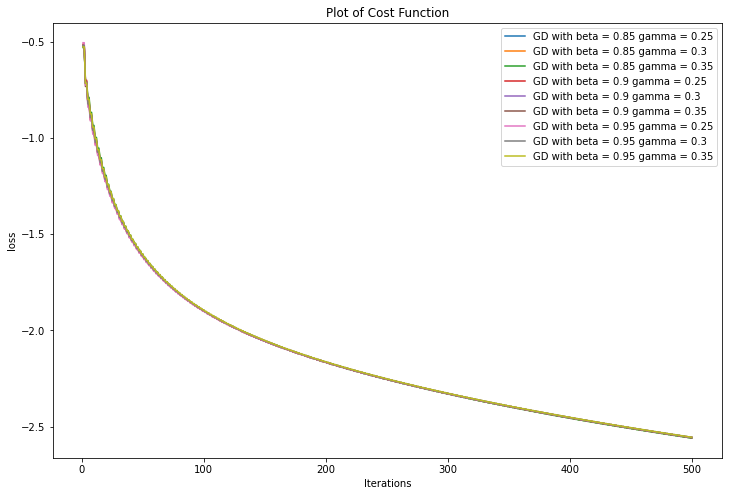

In [112]:
T = 500
beta_vals = [0.85, 0.9, 0.95]
gamma_vals = [0.25, 0.3, 0.35]
fig, ax = plt.subplots(1, 1, figsize=(12,8))

for i in range (0, len(beta_vals)):
    for j in range (0, len(gamma_vals)):
        w, cost_values = polak_ribiere_gd(X2, y2, beta_vals[i], gamma_vals[j], T)
        ax.plot(np.arange(1, T+1), np.log(cost_values), label='GD with beta = ' + str(beta_vals[i]) + ' gamma = ' + str(gamma_vals[j]))
# ax.set_ylim(-10, 2)
ax.legend()
ax.set_title('Plot of Cost Function')
ax.set_xlabel('Iterations')
ax.set_ylabel('loss')

In [117]:
w, cost_values = polak_ribiere_gd(X2, y2, 0.85, 0.3, T)
preds_test = np.sign(X2_test @ w) 
accuracy_test = np.mean(preds_test == y2_test)

preds_train = np.sign(X2 @ w)
accuracy_train = np.mean(preds_train == y2)
print("Training Accuracy: ", train_accuracy)
print("Testing Accuracy: ", test_accuracy)

Training Accuracy:	0.9760
Test Accuracy:	0.9333


In [147]:
w_gd, cost_func_vals_gd = gradient_descent(X2, y2, 3e-4, 500)

In [160]:
w_inf, cost_func_vals_inf = infinity_gd(X2, y2, 1e-8, 500)

In [161]:
w_unit, cost_func_vals_unit = unit_gd(X2, y2, 3e-4, 500)

In [148]:
w_mom, cost_func_vals_mom = momentum_gd(X2, y2, 1e-4, 0.95, 500)

In [149]:
w_nest, cost_func_vals_nest = nesterov_gd(X2, y2, 1e-4, 0.95, 500)

In [150]:
w_fr, cost_func_vals_fr = fletcher_reeves_gd(X2, y2, 0.85, 0.3, 500)

In [151]:
w_pr, cost_func_vals_pr = polak_ribiere_gd(X2, y2, 0.85, 0.3, 500)

### Comparison of all Gradient Descent Algorithms

Text(0, 0.5, 'loss')

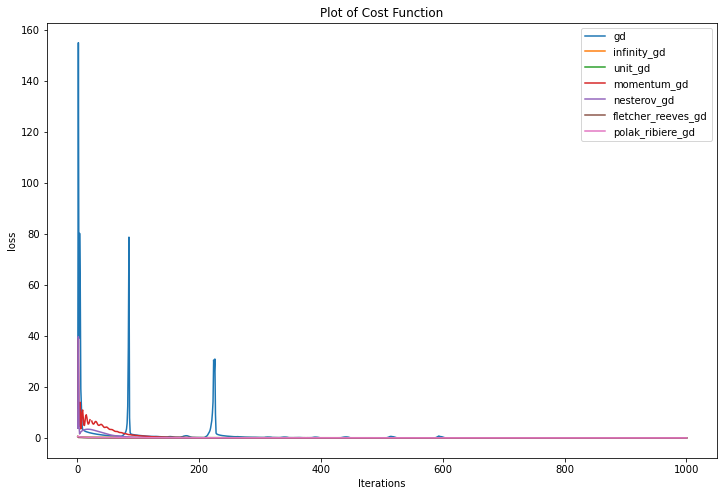

In [162]:
T = 1000
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.plot(np.arange(1, T+1), gradient_descent(X2, y2, 3e-4, T)[1], label='gd')
ax.plot(np.arange(1, T+1), infinity_gd(X2, y2, 1e-8, T)[1], label='infinity_gd')
ax.plot(np.arange(1, T+1), unit_gd(X2, y2, 3e-4, T)[1], label='unit_gd')
ax.plot(np.arange(1, T+1), momentum_gd(X2, y2, 1e-4, 0.95, T)[1], label='momentum_gd')
ax.plot(np.arange(1, T+1), nesterov_gd(X2, y2, 1e-4, 0.95, T)[1], label='nesterov_gd')
ax.plot(np.arange(1, T+1), fletcher_reeves_gd(X2, y2, 0.85, 0.3, T)[1], label='fletcher_reeves_gd')
ax.plot(np.arange(1, T+1), polak_ribiere_gd(X2, y2, 0.85, 0.3, T)[1], label='polak_ribiere_gd')
ax.legend()
ax.set_title('Plot of Cost Function')
ax.set_xlabel('Iterations')
ax.set_ylabel('loss')

Text(0, 0.5, 'loss')

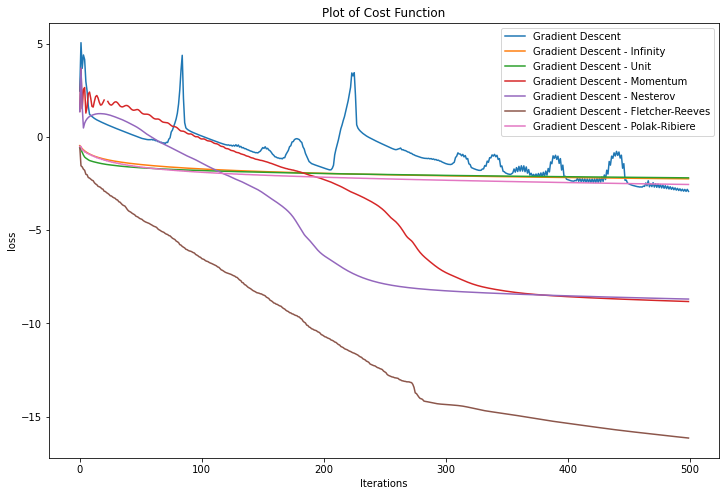

In [163]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.plot(np.log(cost_func_vals_gd), label='Gradient Descent')
ax.plot(np.log(cost_func_vals_inf), label='Gradient Descent - Infinity')
ax.plot(np.log(cost_func_vals_unit), label='Gradient Descent - Unit')
ax.plot(np.log(cost_func_vals_mom), label='Gradient Descent - Momentum')
ax.plot(np.log(cost_func_vals_nest), label='Gradient Descent - Nesterov')
ax.plot(np.log(cost_func_vals_fr), label='Gradient Descent - Fletcher-Reeves')
ax.plot(np.log(cost_func_vals_pr), label='Gradient Descent - Polak-Ribiere')
ax.legend()
ax.set_title('Plot of Cost Function')
ax.set_xlabel('Iterations')
ax.set_ylabel('loss')

From the plot above, the Gradient Descent - Fletcher-Reeves algorithm performs the best. 